In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('RegressionDataset.xlsx', 'Sheet1')
# data = df[df.sqft_living < 6000]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Data cleansing
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

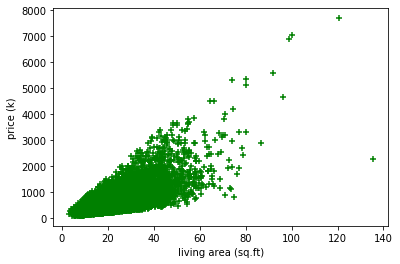

In [4]:
%matplotlib inline
d = df.filter(['sqft_living', 'price'])
plt.xlabel('living area (sq.ft)')
plt.ylabel('price (k)')
plt.scatter(d.sqft_living/100, d.price/1000, color='green', marker='+')

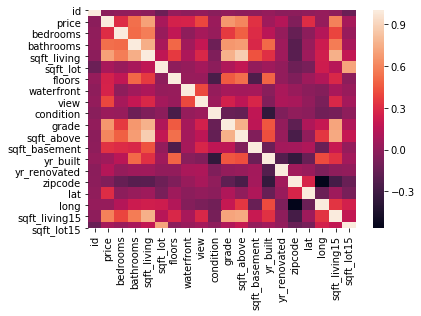

In [5]:
# check for any correlations between variables
corr = df.corr()
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 have a  high influence on price
# bathrooms, view, sqft_basement have weaker influence on price

In [6]:
reg = linear_model.LinearRegression()

In [7]:
reg.fit(d[['sqft_living']], d.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.coef_

array([280.6235679])

In [9]:
reg.intercept_

-43580.743094473844

In [10]:
reg.predict([[1020]])


array([242655.29616092])

In [11]:
reg.predict([[1180]])


array([287555.06702452])

In [12]:
reg.predict([[1600]])


array([405416.96554144])